# 퍼셉트론이란? 

- 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘

- 초기의 인공신경망으로 1957년 코넬 항공 연구소의 Frank Rosenblatt라는 사람이 고안해 내었다. 

![Frank Rosenblatt](http://www.enzyklopaedie-der-wirtschaftsinformatik.de/Members/wilex4/Rosen-2.jpg/image_preview "1957년 프랑크 로젠블라트가 고안")

Dendrite : 이웃 뉴런에서 전기 신호를 받는다.

Synapse : 다른 뉴런과 Dendrite의 연결 부위에 있다.
             전기신호의 세기를 재조정한다.

Soma (cell body) : Dendrite로부터 받은
                        여러 전기신호들을 모두 합친다.

Axon : Soma의 전위가 일정 이상이 되면
         이웃 뉴런으로 전기 신호를 보낸다.

![](https://github.com/Eunjung-Cho/Donduk-Ai-Learning-Crew/blob/9ba460d6264d1812d435f2dc1c90e4eb13706237/045ae0991fbc67fe1111f5291b57c148.png?raw=true)












- 각 노드의 가중치와 입력치를 곱한 것을 모두 합한 값이 활성함수에 의해 판단되는데, 그 값이 임계치(보통 0)보다 크면 뉴런이 활성화되고 결과값으로 1을 출력한다. 뉴런이 활성화되지 않으면 결과값으로 -1을 출력

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile10.uf.tistory.com%2Fimage%2F261AC64E56C2D0E7241637)

# 단층 Perceptron 날코딩 구현하기! 


1. AND 게이트 구현하기

In [1]:
import numpy as np


def AND(x1, x2):
    x = np.array([x1, x2]) # 0 아니면 1만 들어간다. 
    w = np.array([0.5, 0.5])
    b = -0.7 #임계값 (b는 bias=치우쳤다의 약자)
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1]) #x[0]= 0,0을 집어 넣어라 
        print(str(xs) + " -> " + str(y)) #xs의 데이터 타입을 스트링으로 바꾸겠다. 

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


2. NAND 게이트 구현하기

In [10]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


3. OR 게이트 구현하기

In [14]:
import numpy as np


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


4. XOR 게이트 구현하기

In [15]:
def XOR(x1, x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


# 다층 Perceptron 이해를 위한 개념

## Activation Function
-  입력값을 비선형(non-linear)방식으로 출력값을 도출하기 위해 사용되는 함수

- 단층 퍼셉트론의 XOR (non-linear. 즉 선으로 나눌수 없는 한계) 방식을 해결하기 위해 등장한 개념

- 즉 다층 퍼셉트론은 linear 레이어를 여러개 쌓는데 아니라 활성화 함수를 이용해서 non-linear를 여러개 쌓는 것

### Heaviside 함수 구현

In [16]:
# 숫자 1개에 대한 헤비사이드 함수
def step_function_simple(x):
  if x>0:
    return 1
  else:
    return 0

In [17]:
step_function_simple(1)

1

In [18]:
step_function_simple(2)

1

In [19]:
step_function_simple(-1)

0

In [20]:
# 벡터(어떤 상수들의 집합)에 대한 헤비사이드 함수
import numpy as np
x=np.array([-1,1,2])

def step_function(x):
  return np.array(x>0, dtype=np.int) #데이터 타입은 T,F 논리형이 아니라 정수형으로 나와야 하기 때문에 바꾼다.

step_function(x)

array([0, 1, 1])

In [21]:
x>0 
# -1은 0보다 크다는 F, 1은 0보다 크다는 T, 2는 0보다 크다는 T

array([False,  True,  True])

### Sigmoid 함수 구현

$f(x)=\frac{1}{1+e^{-x}}$

-> 로지스틱 회귀분석 또는 Neural network의 Binary classification 마지막 레이어의 활성함수로 사용하는 시그모이드

In [26]:
def sigmoid(x):
  return (1 / (1 + np.exp(-x)))

In [27]:
sigmoid(2)

0.8807970779778823

In [28]:
sigmoid(3)

0.9525741268224334

In [29]:
sigmoid(-1)

0.2689414213699951

In [30]:
x

array([-1,  1,  2])

In [32]:
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

### Heaviside 함수 그래프 그리기

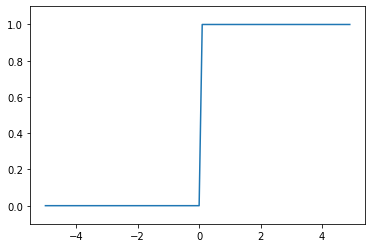

In [33]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

In [34]:
np.arange(-5,5) #-5부터 5까지의 정수를 리스트로

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [35]:
X = np.arange(-5.0, 5.0, 0.1)
X

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

### sigmoid 함수 그래프 그리기


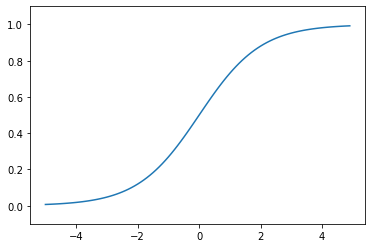

In [37]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return (1 / (1+np.exp(-x)))

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

### heaviside 와 sigmoid 비교

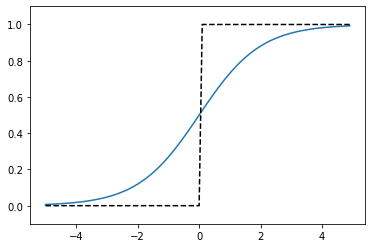

In [38]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return  1 / (1 + np.exp(-x))  


def step_function(x):
    return  np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### Relu 함수 구현 및 그래프

$\begin{split}f(x) = \begin{Bmatrix} x & x > 0 \\
 0 & x <= 0 \end{Bmatrix}\end{split}$

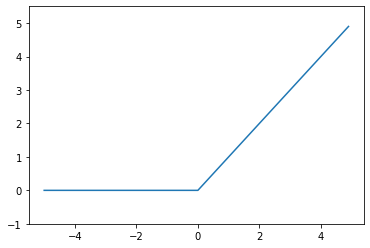

In [39]:
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()


## 인공신경망 구조와 softmax함수

In [40]:
def identity_function(x):
  return x

def init_network(): #신경망 정의하기, 입력변수가 없어도 된다.
  network ={} # 빈 딕셔너리 선언
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) # 딕셔너리에 내용물이 채워짐
  network['b1'] = np.array([0.1,0.2,0.3])
  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2'] = np.array([0.1,0.2])
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['b3'] = np.array([0.1,0.2])

  return network

def forward(network, x): #전기신호 전달 정의
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x,W1)+b1 #입력층에서 1층으로의 신호 전달 network['b3'] = np.array([0.1,0.2])
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2)+b2 # 1층에서 2층으로의 신호 전달
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3)+b3 # 2층에서 출력층으로의 전달
  y= identity_function(a3) # 나중에 이부분을 소프트맥스로 바꿀 예정

  return y

In [41]:
network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
